normal
(128, 128, 1)
(128, 128, 3)


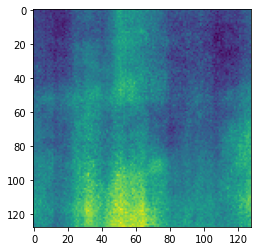

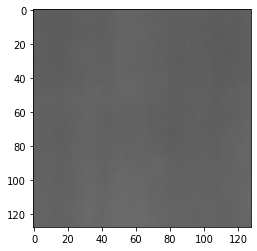

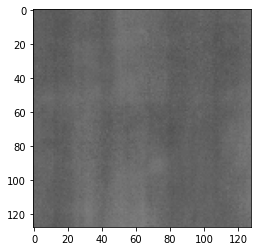

In [109]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tf_clahe

IMG_H = 128
IMG_W = 128
IMG_C = 3  ## Change this to 1 for grayscale.


print("normal")
filename = "mura_data/playground/test/normal/normal.bmp"

img = tf.io.read_file(filename)
img = tf.io.decode_bmp(img)
# print(img.shape)
img = tf.image.resize_with_crop_or_pad(img, IMG_H, IMG_W)
img = tf.cast(img, tf.float32)


print(img.shape)
plt.figure()
plt.imshow(img)

img = tf.image.grayscale_to_rgb(img)
img = tf.cast(img, tf.int64)
print(img.shape)
plt.figure()
plt.imshow(img)

img = tf_clahe.clahe(img, tile_grid_size=(4, 4), clip_limit=3.0)
img = tf.cast(img, tf.int64)
# print(img.shape)
plt.figure()
plt.imshow(img)


defect
(128, 128, 1)
(128, 128, 3)


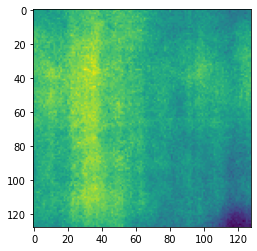

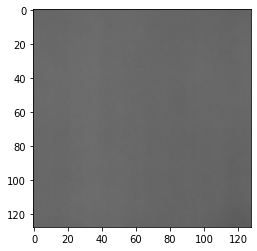

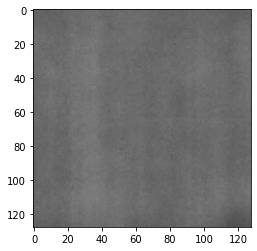

In [110]:
print("defect")
filename = "mura_data/playground/test/defect/defect.bmp"

img = tf.io.read_file(filename)
img = tf.io.decode_bmp(img)
# print(img.shape)
img = tf.image.resize_with_crop_or_pad(img, IMG_H, IMG_W)
img = tf.cast(img, tf.float32)


# print(img.shape)
print(img.shape)
plt.figure()
plt.imshow(img)

img = tf.image.grayscale_to_rgb(img)
img = tf.cast(img, tf.int64)
print(img.shape)
plt.figure()
plt.imshow(img)

img = tf_clahe.clahe(img, tile_grid_size=(4, 4), clip_limit=3.0)
img = tf.cast(img, tf.int64)
# print(img.shape)
plt.figure()
plt.imshow(img)

Found 2 files belonging to 2 classes.


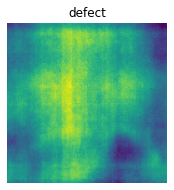

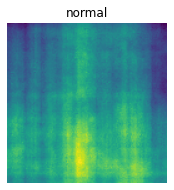

In [104]:
filename = "mura_data/playground/test/"
class_names = ["normal", "defect"]
pixels = tf.keras.preprocessing.image_dataset_from_directory(
        filename,
        label_mode="int",
        image_size=(IMG_H,IMG_W),
        batch_size=1,
        class_names=class_names,
        shuffle=True,
        smart_resize=True,
)
# print(pixels)


# image_batch, label_batch = iter(pixels)
# print(image_batch, label_batch)
plt.figure(figsize=(10, 10))
for images, labels in pixels.take(1):
    images = tf.map_fn(lambda img: tf.image.rgb_to_grayscale(img), images)
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("float32")
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
#         img = tf.image.rgb_to_grayscale(img)
#         plt.figure()
#         plt.imshow(img)

#         img = tf_clahe.clahe(img, tile_grid_size=(4, 4), clip_limit=3.0)
#         plt.figure()
#         plt.imshow(img)
        
plt.figure(figsize=(10, 10))
for images, labels in pixels.take(2):
    images = tf.map_fn(lambda img: tf.image.rgb_to_grayscale(img), images)
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("float32")
        plt.imshow(img)
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
#         img = tf.image.rgb_to_grayscale(img)
#         plt.figure()
#         plt.imshow(img)

#         img = tf_clahe.clahe(img, tile_grid_size=(4, 4), clip_limit=3.0)
#         plt.figure()
#         plt.imshow(img)
# print(pixels)
# plt.figure()
# plt.imshow(pixels)

# img = tf.image.rgb_to_grayscale(pixels)
# print(pixels)
# plt.figure()
# plt.imshow(pixels)

# img = tf_clahe.clahe(pixels, tile_grid_size=(4, 4), clip_limit=3.0)
# print(pixels)
# plt.figure()
# plt.imshow(pixels)

In [ ]:
# load image dataset for trainnig without labels
def load_image_train(filename, batch_size,size=(IMG_H,IMG_W)):
	# load image with the preferred size
	pixels = tf.keras.preprocessing.image_dataset_from_directory(
        filename, labels=None,
        label_mode=None,
        image_size=batch_size,
        batch_size=1,
        shuffle=True,
        smart_resize=True,
    )

	return pixels